# **<center><u>Fetal Health Prediction using Machine Learning.</u></center>**

#### **<u>Abstract</u>**

**Classify fetal health in order to prevent child and maternal mortality**

#### **<u>Data</u>**

**This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes: **

* *Normal*
* *Suspect*
* *Pathological*

#### **<u>Objective</u>**

**Create a multiclass model to classify CTG features into the above mentioned bthree fetal health states.**

#### **[Dataset Source](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)**


In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [88]:
df = pd.read_csv('./fetal_health.csv')

df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [90]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [91]:
# converting the data into training and testing data

x = df.iloc[:, :-1].values # input data
y = df.iloc[:, -1].values # output data

In [92]:
# splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [93]:
# Normalization of data

scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

In [94]:
# training various different machine learning model to select one with most accuracy

models = [SVC(), KNeighborsClassifier(n_neighbors = 5), GaussianNB(), DecisionTreeClassifier(), LogisticRegression()]

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred) * 100
    print("{}: {}".format(model,score), end="\n\n")

SVC(): 91.06583072100314

KNeighborsClassifier(): 89.65517241379311

GaussianNB(): 70.21943573667711

DecisionTreeClassifier(): 90.59561128526646

LogisticRegression(): 90.12539184952978



#### It was found through testing that ***DecisionTreeClassifier*** provides the ***most accurate result*** among all the trained and tested model. Hence proceeding with running DecisionTreeClassifier model on the testing data.

In [95]:
# Running the DecisionTreeClassifier model on the testing data again for more detailed analysis

model = models[3] # 3 being the index position of the classifier initialization on the above array of models

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

report = classification_report(y_test, y_pred, target_names = ["Normal - 1.0", "Suspect - 2.0", "Pathological - 3.0"])

print(report, end="")

                    precision    recall  f1-score   support

      Normal - 1.0       0.94      0.96      0.95       490
     Suspect - 2.0       0.77      0.66      0.71        96
Pathological - 3.0       0.86      0.92      0.89        52

          accuracy                           0.91       638
         macro avg       0.86      0.85      0.85       638
      weighted avg       0.91      0.91      0.91       638


In [96]:
confusion = confusion_matrix(y_test, y_pred)

confusion

array([[472,  16,   2],
       [ 27,  63,   6],
       [  1,   3,  48]])

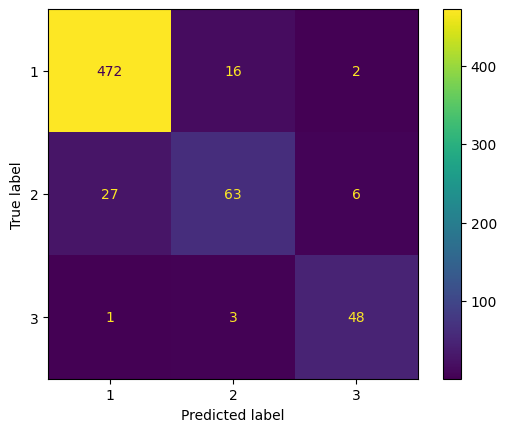

In [97]:
cmd = ConfusionMatrixDisplay(confusion, display_labels = [1, 2, 3])

cmd.plot()